In [1]:
import numpy as np
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
poles = pd.read_csv('../data/bird_poles.csv')

In [54]:
poles

,Identifier,Plate Name,Area,Latitude,Longitude,Rotation_Rate,Reference
0,AF,Africa,1.44065,59.160,−73.174,0.9270,DeMets et al. [1994]
1,AM,Amur,0.13066,57.645,−83.736,0.9309,Heki et al. [1999]
2,AN,Antarctica,1.43268,64.315,−83.984,0.8695,DeMets et al. [1994]
3,AP,Altiplano,0.02050,33.639,−81.177,0.9160,Lamb [2000]
4,AR,Arabia,0.12082,59.658,−33.193,1.1616,DeMets et al. [1994]
5,AS,Aegean Sea,0.00793,74.275,−87.237,0.6497,McClusky et al. [2000]
6,AT,Anatolia,0.01418,56.283,8.932,1.6400,McClusky et al. [2000]
7,AU,Australia,1.13294,60.080,1.742,1.0744,DeMets et al. [1994]
8,BH,Birds Head,0.01295,12.559,87.957,0.3029,this paper
9,BR,Balmoral Reef,0.00481,45.900,−111.000,0.2000,this paper


In [4]:
with open('../data/eur_nam.geojson') as ff:
    eur_nam_gj = json.load(ff)

In [5]:
eur_nam_gj

{'type': 'FeatureCollection',
 'name': 'eur_nam',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'catalog_id': 'PB_2359.0',
    'catalog_name': 'Bird 2003',
    'slip_type': 'Spreading Ridge',
    'name': None,
    'reference': None,
    'net_slip_rate': '(23.1,,)',
    'average_dip': None,
    'average_rake': None,
    'epistemic_quality': '1',
    'lower_seis_depth': None,
    'upper_seis_depth': None,
    'accuracy': None,
    'activity_confidence': '1',
    'fz_name': None,
    'last_movement': None,
    'dip_dir': None,
    'downthrown_side_dir': None,
    'vert_slip_rate': None,
    'strike_slip_rate': '(0.5,,)',
    'exposure_quality': None,
    'shortening_rate': '(-23.0,,)',
    'notes': None,
    'downthrown_side_id': None},
   'geometry': {'type': 'LineString',
    'coordinates': [[-29.278, 40.871],
     [-29.27631, 40.879769],
     [-29.27462, 40.888539],
     [-29.27293, 40.897308],
 

1. calculate the slip vector for each fault
    (vector is top relative to bottom)
    1. calculate fault strike
    2. calculate horizontal slip vector
        1. calculate ve, vn from spreading/shortening
        2. calculate ve, vn from strike-slip
        3. add them.

In [6]:
def extract_number(tup_str):
    return literal_eval(tup_str.strip('(').split(',')[0])

In [7]:
extract_number(eur_nam_gj['features'][0]['properties']['shortening_rate'])

-23.0

In [8]:
f0 = eur_nam_gj['features'][0]

In [36]:
def calc_strike(lon0, lat0, lon1, lat1):
    
    y = np.sin(lon1-lon0) * np.cos(lat1)
    x = np.cos(lat0) * np.sin(lat1) \
        - np.sin(lat0) * np.cos(lat1) * np.cos(lon1-lon0)
    
    #return angle_to_az(np.arctan2(y,x))
    return np.degrees(np.arctan2(y,x))
    

def az_to_angle(az):
    #az_r = np.radians(az)
    #return np.pi/2 - az_r
    
    return np.radians(90-az)

def angle_to_az(angle):
    return -(np.degrees(angle) - 90)


def rotate_vecs(dx, dy, strike):
    ang = az_to_angle(strike)
    
    de = dx * np.cos(ang) - dy * np.sin(ang)
    dn = dx * np.sin(ang) + dy * np.cos(ang)
    
    return np.array([de, dn])

def fault_strike(fault):
    lon0, lat0 = np.radians(fault['geometry']['coordinates'][0])
    lon1, lat1 = np.radians(fault['geometry']['coordinates'][-1])
    
    return calc_strike(lon0, lat0, lon1, lat1)

In [37]:
def slip_vec_to_ven(dex, ext, strike):
    return rotate_vecs(dex, ext, strike)

(-29.2791, -29.2549, 40.865300000000005, 40.9907)

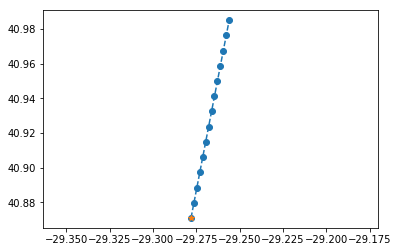

In [38]:
plt.plot(np.array(f0['geometry']['coordinates'])[:,0],
         np.array(f0['geometry']['coordinates'])[:,1],
         'o--')

plt.plot(np.array(f0['geometry']['coordinates'])[0,0],
         np.array(f0['geometry']['coordinates'])[0,1],
         '*')

plt.axis('equal')

In [39]:
fault_strike(f0)

8.288333433011669

In [16]:
for ang in (0, 45, 90, 135, 180, 225, 270, 315):
    print(ang, np.degrees(az_to_angle(ang)))

0 90.0
45 45.0
90 0.0
135 -45.0
180 -90.0
225 -135.0
270 -180.0
315 -225.0


In [11]:
angle_to_az(az_to_angle(-36))

-36.0

In [12]:
def test_slip_vec_to_ven():
    
    sqrt2 = np.sqrt(2.)
    
    def test_args(args, outs):
        if np.allclose(slip_vec_to_ven(*args),
                              np.array(outs)):
            print('passes on', args)
    
        else:
            print('fails on', args)
            
    test_dict = {
        (1.,0.,0.): (0.,1.),
        (1.,0.,45.): (sqrt2/2.,sqrt2/2.),
        (1.,0.,90.): (1.,0.),
        (1.,0.,135.): (sqrt2/2.,-sqrt2/2.),
        
        (0.,1.,0.): (-1.,0.),
        (0.,1.,45.): (-sqrt2/2., sqrt2/2),
        (0.,1.,90.): (0.,1.),
        (0.,1.,135): (sqrt2/2., sqrt2/2.),
        
        (1.,1.,0.): (-1.,1),
        (-1., 1.,0.): (-1,-1),
        (1.,-1.,0.): (1,1),
        (-1,-1,0.): (1,-1),
        
        (1.,1.,45.): (0.,sqrt2),
        (-1.,1.,45.): (-sqrt2,0.),
        (1.,-1.,45.): (sqrt2,0.),
        (-1.,-1.,45.): (0.,-sqrt2),
        (1.,1.,90.): (1.,1.),
        (-1.,1.,90.): (-1.,1.),
        (1.,-1.,90.): (1.,-1.),
        (-1.,-1.,90.): (-1.,-1.),
        (1.,1.,135.): (sqrt2,0.),
        (-1.,1.,135.): (0.,sqrt2),
        (1.,-1.,135.): (0.,-sqrt2),
        (-1.,-1.,135.): (-sqrt2,0.),
                 
                
                
                
                
                }
    
    for args, outs in test_dict.items():
        test_args(args, outs)
            
    
                

In [13]:
slip_vec_to_ven(1,-1,0.)

array([1., 1.])

In [14]:
test_slip_vec_to_ven()

passes on (1.0, 0.0, 0.0)
passes on (1.0, 0.0, 45.0)
passes on (1.0, 0.0, 90.0)
passes on (1.0, 0.0, 135.0)
passes on (0.0, 1.0, 0.0)
passes on (0.0, 1.0, 45.0)
passes on (0.0, 1.0, 90.0)
passes on (0.0, 1.0, 135)
passes on (1.0, 1.0, 0.0)
passes on (-1.0, 1.0, 0.0)
passes on (1.0, -1.0, 0.0)
passes on (-1, -1, 0.0)
passes on (1.0, 1.0, 45.0)
passes on (-1.0, 1.0, 45.0)
passes on (1.0, -1.0, 45.0)
passes on (-1.0, -1.0, 45.0)
passes on (1.0, 1.0, 90.0)
passes on (-1.0, 1.0, 90.0)
passes on (1.0, -1.0, 90.0)
passes on (-1.0, -1.0, 90.0)
passes on (1.0, 1.0, 135.0)
passes on (-1.0, 1.0, 135.0)
passes on (1.0, -1.0, 135.0)
passes on (-1.0, -1.0, 135.0)


In [15]:
az_to_angle(-90)

3.141592653589793

In [23]:
calc_strike(0,0,1,0)

-0.0

In [25]:
def get_slip_vector(fault):
    ext_rate = -1 * extract_number(fault['properties']['shortening_rate'])
    ss_rate = extract_number(fault['properties']['strike_slip_rate'])
    
    if fault['properties']['slip_type'] == 'Sinistral Transform':
        ss_rate *= -1
        
    return slip_vec_to_ven(ss_rate, ext_rate, fault_strike(fault))
        
    
    

In [26]:
np.unique([f['properties']['slip_type'] for f in eur_nam_gj['features']])

array(['Dextral Transform', 'Sinistral Transform', 'Spreading Ridge'],
      dtype='<U19')

In [27]:
len(eur_nam_gj['features'])

16

In [40]:
en_slip_vecs = [get_slip_vector(f) for f in eur_nam_gj['features']]

In [41]:
en_slip_vecs

[array([-22.68769138,   3.81033593]),
 array([-22.72828746,   2.7775797 ]),
 array([-22.77551562,   2.85059439]),
 array([-22.76137531,   2.91886862]),
 array([-21.26998938,   8.47806298]),
 array([-22.50144412,   3.71147041]),
 array([-22.67646069,   2.79787965]),
 array([-22.50473132,   2.86305226]),
 array([-20.8724268 ,   8.92142362]),
 array([-22.24604333,   4.01541481]),
 array([-20.81450534,   8.804338  ]),
 array([-21.59751076,   2.99124202]),
 array([-21.46340409,   2.74267845]),
 array([-21.39921685,   2.30727502]),
 array([-18.48282484,   9.81199194]),
 array([-19.78219271,   5.70305632])]

In [29]:
[f['properties'] for f in eur_nam_gj['features']]

[{'catalog_id': 'PB_2359.0',
  'catalog_name': 'Bird 2003',
  'slip_type': 'Spreading Ridge',
  'name': None,
  'reference': None,
  'net_slip_rate': '(23.1,,)',
  'average_dip': None,
  'average_rake': None,
  'epistemic_quality': '1',
  'lower_seis_depth': None,
  'upper_seis_depth': None,
  'accuracy': None,
  'activity_confidence': '1',
  'fz_name': None,
  'last_movement': None,
  'dip_dir': None,
  'downthrown_side_dir': None,
  'vert_slip_rate': None,
  'strike_slip_rate': '(0.5,,)',
  'exposure_quality': None,
  'shortening_rate': '(-23.0,,)',
  'notes': None,
  'downthrown_side_id': None},
 {'catalog_id': 'PB_2368.0',
  'catalog_name': 'Bird 2003',
  'slip_type': 'Dextral Transform',
  'name': None,
  'reference': None,
  'net_slip_rate': '(22.9,,)',
  'average_dip': None,
  'average_rake': None,
  'epistemic_quality': '1',
  'lower_seis_depth': None,
  'upper_seis_depth': None,
  'accuracy': None,
  'activity_confidence': '1',
  'fz_name': None,
  'last_movement': None,
  'di

In [30]:
en = gpd.read_file('../data/eur_nam.geojson')

In [ ]:
en['ve'] = [v[0]]

In [31]:
en

,catalog_id,catalog_name,slip_type,name,reference,net_slip_rate,average_dip,average_rake,epistemic_quality,lower_seis_depth,...,last_movement,dip_dir,downthrown_side_dir,vert_slip_rate,strike_slip_rate,exposure_quality,shortening_rate,notes,downthrown_side_id,geometry
0,PB_2359.0,Bird 2003,Spreading Ridge,None,None,"(23.1,,)",None,None,1,None,...,None,None,None,None,"(0.5,,)",None,"(-23.0,,)",None,None,"LINESTRING (-29.278 40.871, -29.27631 40.87976..."
1,PB_2368.0,Bird 2003,Dextral Transform,None,None,"(22.9,,)",None,None,1,None,...,None,None,None,None,"(22.7,,)",None,"(-3.0,,)",None,None,"LINESTRING (-29.162 41.91, -29.172997 41.91211..."
2,PB_2370.0,Bird 2003,Spreading Ridge,None,None,"(22.9,,)",None,None,1,None,...,None,None,None,None,"(3.4,,)",None,"(-22.7,,)",None,None,"LINESTRING (-29.242 42.083, -29.242272 42.0913..."
3,PB_2373.0,Bird 2003,Dextral Transform,None,None,"(22.9,,)",None,None,1,None,...,None,None,None,None,"(22.8,,)",None,"(2.6,,)",None,None,"LINESTRING (-29.223 42.289, -29.234777 42.2891..."
4,PB_2377.0,Bird 2003,Spreading Ridge,None,None,"(22.9,,)",None,None,1,None,...,None,None,None,None,"(3.0,,)",None,"(-22.7,,)",None,None,"LINESTRING (-29.339 42.613, -29.336003 42.6217..."
5,PB_2381.0,Bird 2003,Spreading Ridge,None,None,"(22.8,,)",None,None,1,None,...,None,None,None,None,"(0.5,,)",None,"(-22.8,,)",None,None,"LINESTRING (-29.349 42.838, -29.347311 42.8466..."
6,PB_2384.0,Bird 2003,Sinistral Transform,None,None,"(22.8,,)",None,None,1,None,...,None,None,None,None,"(22.7,,)",None,"(-2.6,,)",None,None,"LINESTRING (-29.317 43.081, -29.305083 43.0809..."
7,PB_2391.0,Bird 2003,Sinistral Transform,None,None,"(22.7,,)",None,None,1,None,...,None,None,None,None,"(22.5,,)",None,"(-2.9,,)",None,None,"LINESTRING (-28.796 43.768, -28.783636 43.7680..."
8,PB_2396.0,Bird 2003,Spreading Ridge,None,None,"(22.7,,)",None,None,1,None,...,None,None,None,None,"(3.0,,)",None,"(-22.5,,)",None,None,"LINESTRING (-28.455 44.096, -28.451836 44.1041..."
9,PB_2401.0,Bird 2003,Spreading Ridge,None,None,"(22.6,,)",None,None,1,None,...,None,None,None,None,"(0.5,,)",None,"(-22.6,,)",None,None,"LINESTRING (-28.282 44.405, -28.28008 44.41369..."


In [44]:
def get_fault_midpoint(fault):
    lon0, lat0 = fault['geometry']['coordinates'][0]
    lon1, lat1 = fault['geometry']['coordinates'][-1]
    
    return np.mean((lon0, lon1)), np.mean((lat0, lat1))
    

In [45]:
en_mids = [get_fault_midpoint(f) for f in eur_nam_gj['features']]

In [46]:
en_mids

[(-29.267, 40.928),
 (-29.2115, 41.9195),
 (-29.2435, 42.129),
 (-29.329, 42.29),
 (-29.3285, 42.6435),
 (-29.338, 42.8945),
 (-29.2455, 43.0805),
 (-28.66, 43.768),
 (-28.4455, 44.1205),
 (-28.2695, 44.4615),
 (-28.127, 44.999),
 (-29.4675, 50.442499999999995),
 (-30.003500000000003, 51.692499999999995),
 (-32.206500000000005, 52.536),
 (-35.025999999999996, 55.587500000000006),
 (-33.522, 57.125)]

In [48]:
fault_vels_en = pd.DataFrame(index=en.index)

In [49]:
fault_vels_en['lon'] = [e[0] for e in en_mids]
fault_vels_en['lat'] = [e[1] for e in en_mids]

In [50]:
fault_vels_en['ve'] = [s[0] for s in en_slip_vecs]
fault_vels_en['vn'] = [s[1] for s in en_slip_vecs]

In [51]:
fault_vels_en

,lon,lat,ve,vn
0,-29.2670,40.9280,-22.687691,3.810336
1,-29.2115,41.9195,-22.728287,2.777580
2,-29.2435,42.1290,-22.775516,2.850594
3,-29.3290,42.2900,-22.761375,2.918869
4,-29.3285,42.6435,-21.269989,8.478063
5,-29.3380,42.8945,-22.501444,3.711470
6,-29.2455,43.0805,-22.676461,2.797880
7,-28.6600,43.7680,-22.504731,2.863052
8,-28.4455,44.1205,-20.872427,8.921424
9,-28.2695,44.4615,-22.246043,4.015415


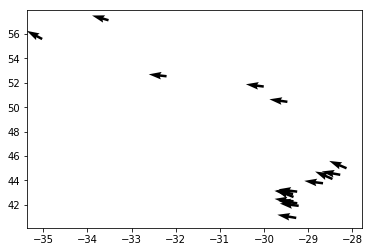

In [52]:
plt.quiver(fault_vels_en.lon, fault_vels_en.lat, fault_vels_en.ve, fault_vels_en.vn)

In [53]:
fault_vels_en['fault_seg'] = en['catalog_id']

In [55]:
fault_vels_en['plates'] = 'na_eu'

In [57]:
with open('../data/afr_eur.geojson') as ff:
    af_eu_gj = json.load(ff)

In [58]:
ae_slip_vecs = [get_slip_vector(f) for f in af_eu_gj['features']]

In [59]:
ae_mids = [get_fault_midpoint(f) for f in af_eu_gj['features']]

In [60]:
fault_vels_ae = pd.DataFrame(data=[a[0] for a in ae_mids], columns=['lon'])

In [61]:
fault_vels_ae['lat'] = [a[1] for a in ae_mids]
fault_vels_ae['ve'] = [a[0] for a in ae_slip_vecs]
fault_vels_ae['vn'] = [a[1] for a in ae_slip_vecs]

In [62]:
fault_vels_ae['fault_seg'] = gpd.read_file('../data/afr_eur.geojson')['catalog_id']

In [63]:
fault_vels_ae

,lon,lat,ve,vn,fault_seg
0,-29.5525,39.3575,4.196153,1.939666,PB_250.0
1,-28.3535,39.0065,4.110343,1.762124,PB_272.0
2,-27.0595,38.5310,4.016389,1.465818,PB_289.0
3,-26.7740,38.3490,4.031357,1.388583,PB_294.0
4,-26.4555,38.1855,4.023009,1.259126,PB_299.0
5,-25.5855,37.7700,3.923005,1.122511,PB_310.0
6,-25.1840,37.7075,3.855983,1.049472,PB_315.0
7,-23.2315,36.6740,3.657897,0.591432,PB_338.0
8,-20.5185,36.9175,3.748293,0.017380,PB_342.0
9,-18.3710,37.3865,3.865873,-0.474366,PB_345.0


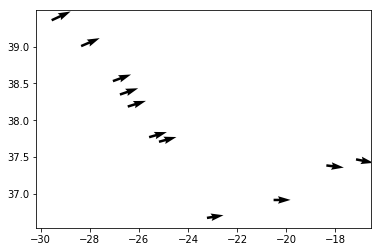

In [64]:
plt.quiver(fault_vels_ae.lon, fault_vels_ae.lat, fault_vels_ae.ve, fault_vels_ae.vn)

In [65]:
fault_vels_ae['plates'] = 'af_eu'

In [66]:
with open('../data/nam_afr.geojson') as ff:
    af_na_gj = json.load(ff)

In [67]:
an_slip_vecs = [get_slip_vector(f) for f in af_na_gj['features']]
an_mids = [get_fault_midpoint(f) for f in af_na_gj['features']]
fault_vels_an = pd.DataFrame(data=[a[0] for a in an_mids], columns=['lon'])
fault_vels_an['lat'] = [a[1] for a in an_mids]
fault_vels_an['ve'] = [a[0] for a in an_slip_vecs]
fault_vels_an['vn'] = [a[1] for a in an_slip_vecs]
fault_vels_an['fault_seg'] = gpd.read_file('../data/nam_afr.geojson')['catalog_id']

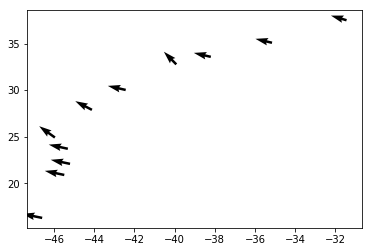

In [68]:
plt.quiver(fault_vels_an.lon, fault_vels_an.lat, fault_vels_an.ve, fault_vels_an.vn)

In [69]:
fault_vels_an['plates'] = 'na_af'

In [70]:
ls ../data

afr_eur.geojson  eur_nam.geojson  nam_sam.geojson
bird_poles.csv   nam_afr.geojson  sam_afr.geojson


In [71]:
with open('../data/nam_sam.geojson') as ff:
    na_sa_gj = json.load(ff)

In [73]:
ns_slip_vecs = [get_slip_vector(f) for f in na_sa_gj['features']]
ns_mids = [get_fault_midpoint(f) for f in na_sa_gj['features']]
fault_vels_ns = pd.DataFrame(data=[a[0] for a in ns_mids], columns=['lon'])
fault_vels_ns['lat'] = [a[1] for a in ns_mids]
fault_vels_ns['ve'] = [a[0] for a in ns_slip_vecs]
fault_vels_ns['vn'] = [a[1] for a in ns_slip_vecs]
fault_vels_ns['fault_seg'] = gpd.read_file('../data/nam_sam.geojson')['catalog_id']

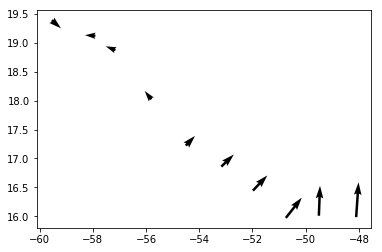

In [74]:
plt.quiver(fault_vels_ns.lon, fault_vels_ns.lat, fault_vels_ns.ve, fault_vels_ns.vn)

In [81]:
fault_vels_ns['plates'] = 'na_sa'

In [77]:
with open('../data/sam_afr.geojson') as ff:
    sa_af_gj = json.load(ff)

In [79]:
sa_slip_vecs = [get_slip_vector(f) for f in sa_af_gj['features']]
sa_mids = [get_fault_midpoint(f) for f in sa_af_gj['features']]
fault_vels_sa = pd.DataFrame(data=[a[0] for a in sa_mids], columns=['lon'])
fault_vels_sa['lat'] = [a[1] for a in sa_mids]
fault_vels_sa['ve'] = [a[0] for a in sa_slip_vecs]
fault_vels_sa['vn'] = [a[1] for a in sa_slip_vecs]
fault_vels_sa['fault_seg'] = gpd.read_file('../data/sam_afr.geojson')['catalog_id']

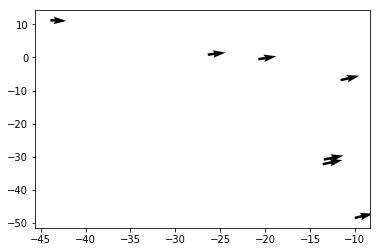

In [80]:
plt.quiver(fault_vels_sa.lon, fault_vels_sa.lat, fault_vels_sa.ve, fault_vels_sa.vn)

In [82]:
fault_vels_sa['plates'] = 'af_sa'

In [83]:
fault_vels = pd.concat((fault_vels_ae, fault_vels_an, fault_vels_en, fault_vels_ns, fault_vels_sa))

In [84]:
fault_vels

,lon,lat,ve,vn,fault_seg,plates
0,-29.5525,39.3575,4.196153,1.939666,PB_250.0,af_eu
1,-28.3535,39.0065,4.110343,1.762124,PB_272.0,af_eu
2,-27.0595,38.5310,4.016389,1.465818,PB_289.0,af_eu
3,-26.7740,38.3490,4.031357,1.388583,PB_294.0,af_eu
4,-26.4555,38.1855,4.023009,1.259126,PB_299.0,af_eu
5,-25.5855,37.7700,3.923005,1.122511,PB_310.0,af_eu
6,-25.1840,37.7075,3.855983,1.049472,PB_315.0,af_eu
7,-23.2315,36.6740,3.657897,0.591432,PB_338.0,af_eu
8,-20.5185,36.9175,3.748293,0.017380,PB_342.0,af_eu
9,-18.3710,37.3865,3.865873,-0.474366,PB_345.0,af_eu


In [86]:
fault_vels.to_csv('../data/fault_vels.csv', index=False, header=True)